<a href="https://colab.research.google.com/github/charliashby/labs/blob/main/Ashby_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! git clone https://www.github.com/DS3001/the_bootstrap


Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (3/3), done.


#Q1

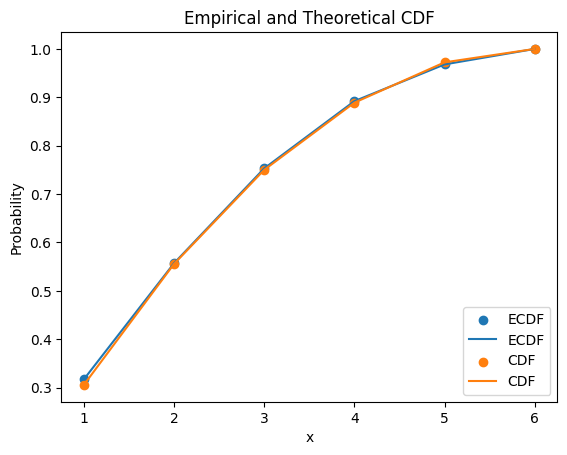

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.
faces = np.array([1,2,3,4,5,6])

# Explicit calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

# Bootstrap simulation:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

Expected value:  3.5164


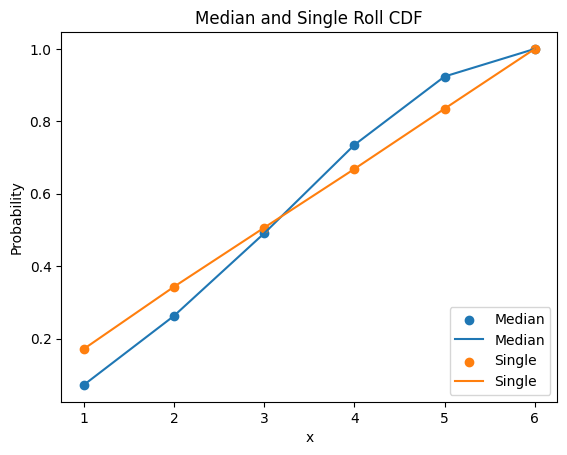

In [ ]:
## 2.
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(med_roll)/N

# # Comparison:
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

                 0
count  50000.00000
mean       4.18316
std        3.29378
min        1.00000
25%        2.00000
50%        3.00000
75%        5.00000
max       35.00000


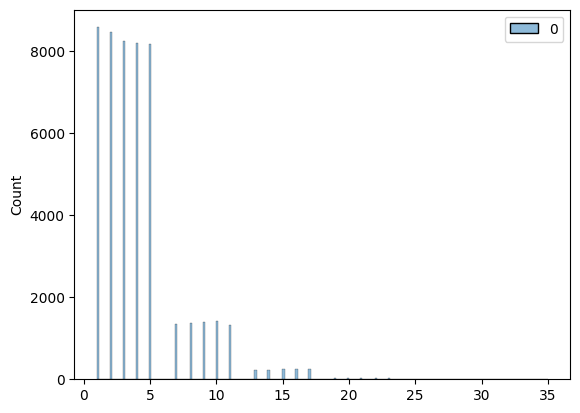

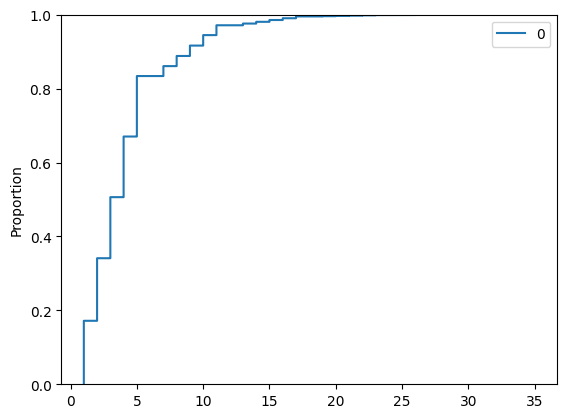

In [ ]:
## 3.

N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

#Q2

Saving mammogram.csv to mammogram.csv
breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 

Raw treatment effect:  0.00011505110015985753


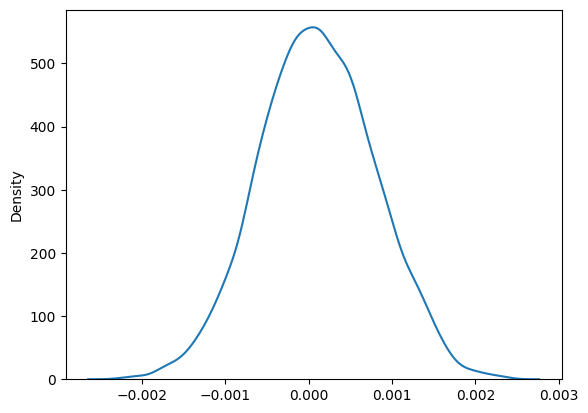

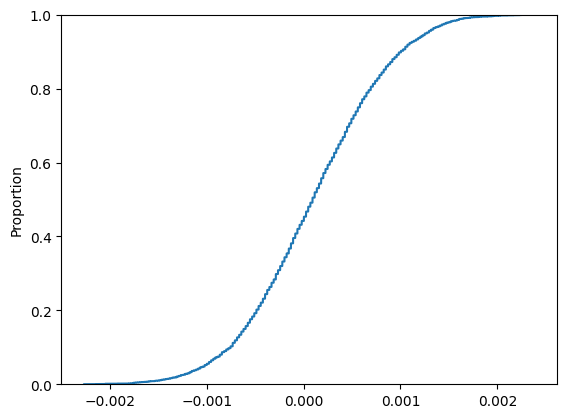

99% confidence interval: ( -0.0016885249259416728 ,  0.0018518347397819138 )


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('mammogram.csv')

## 1.

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

## 2.

df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

## 3.
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )


The 99% confidence interval includes zero, which means we don’t see a statistically significant difference in 25-year survival rates between people who got mammograms and those who didn’t. That said, this is just a data exercise, and I’m not suggesting that mammograms shouldn’t be used or funded as part of regular healthcare. If we were to take these results seriously, there are some important questions we’d need to ask:

1. **Were Mammograms Randomly Assigned?** If people chose to get mammograms (rather than being randomly assigned), there could be selection bias. For example, wealthier people who are generally healthier might be more likely to get mammograms, which could make it look like mammograms don’t help much because the treatment group might already have a lower risk of breast cancer.

2. **Other Risk Factors**: Are there other factors that affect breast cancer risk? Mammograms might not show a big effect at the population level but could still be very helpful for high-risk groups.

3. **More Than Just Survival Rates**: This analysis only looks at survival rates, but mammograms could improve other outcomes. For example, catching cancer early might mean fewer people need chemotherapy or other intense treatments, even if survival rates are similar.

4. **Different Effects for Different Groups**: It’s possible that mammograms work better for certain groups of people, like those with a higher risk of breast cancer.

This kind of analysis is useful for exploring whether a treatment works and if zero (no effect) is a realistic result. But it’s important to think about other factors that could influence the results and remember that this is just one way of looking at the data. An expert in cancer screening would probably have even more insights into these questions.